# anscombe's quartet

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

4 datasets with identical statistics but very different shape.

In [36]:
import torch as t
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [100]:
d1 = t.tensor([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]])
d2 = t.tensor([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]])
d3 = t.tensor([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]])
d4 = t.tensor([[8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
               [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]])
ds = t.stack([d1, d2, d3, d4])

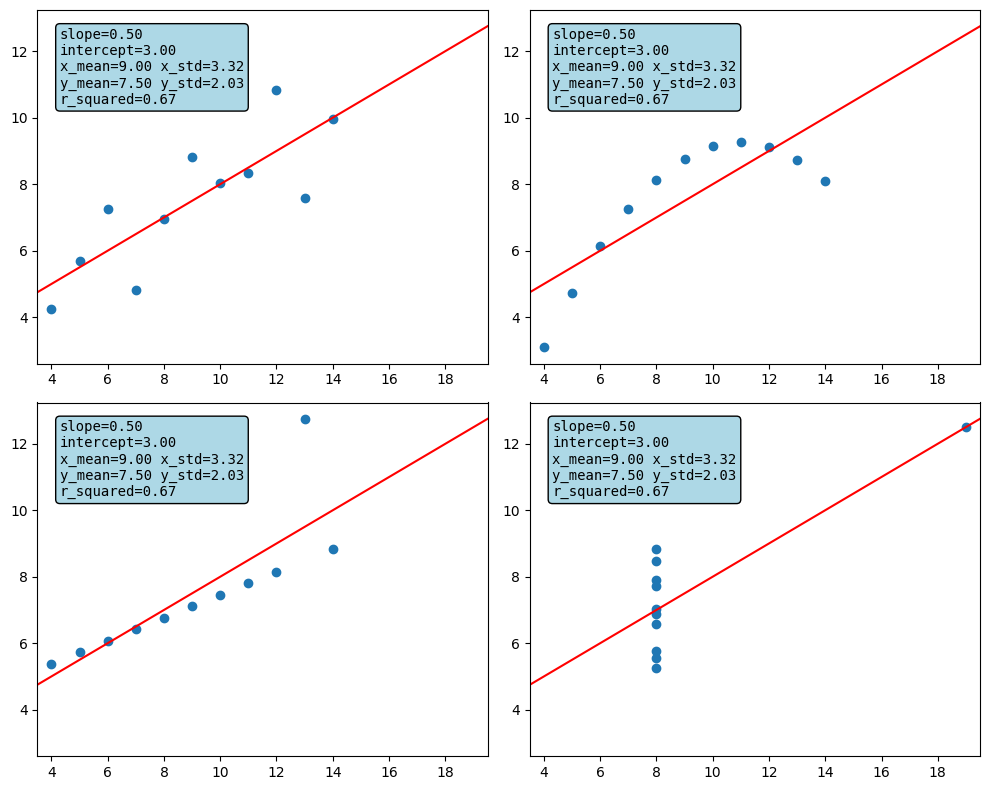

In [101]:
def plot(d, ax, xlim, ylim):
    model = LinearRegression().fit(d[0].view(-1, 1), d[1])
    slope, intercept = model.coef_[0], model.intercept_
    x_mean, y_mean = d[0].mean(), d[1].mean()
    x_std, y_std = d[0].std(), d[1].std()
    r_squared = model.score(d[0].view(-1, 1), d[1])
    stats = (f'{slope=:.2f}\n'
             f'{intercept=:.2f}\n'
             f'{x_mean=:.2f} {x_std=:.2f}\n'
             f'{y_mean=:.2f} {y_std=:.2f}\n'
             f'{r_squared=:.2f}')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.text(0.05, 0.95, stats, transform=ax.transAxes, verticalalignment='top', fontdict={'family': 'monospace'},
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', edgecolor='black'))
    ax.plot(t.tensor(xlim), slope * t.tensor(xlim) + intercept, color='red')
    ax.scatter(d[0], d[1])

def plot_all(ds, figsize=(10, 8), margin=0.5):
    _, axes = plt.subplots(2, 2, figsize=figsize)
    xlim = (ds[:, 0].min() - margin, ds[:, 0].max() + margin)
    ylim = (ds[:, 1].min() - margin, ds[:, 1].max() + margin)
    for i, ax in enumerate(axes.flat):
        plot(ds[i], ax, xlim, ylim)
    plt.tight_layout()
    plt.show()

plot_all(ds)